# Tornado

A bad series of tornados ripped through parts of the midwest last night. Lets collect the tweets that contain video from last night, that aren't retweets, and convert it to csv.

In [6]:
! pip install --upgrade twarc --quiet
! pip install --upgrade twarc-csv --quiet
! twarc2 search 'tornado has:videos -is:retweet' --start-time "2021-12-10T12:00:00" tornado.jsonl
! twarc2 csv tornado.jsonl tornado.csv

100%|██████████████████| Processed a day/a day [00:14<00:00, 1606 tweets total ]
100%|██████████████| Processed 3.97M/3.97M of input file [00:00<00:00, 7.72MB/s]

ℹ️
Parsed 1606 tweets objects from 17 lines in the input file.
Wrote 1606 rows and output 74 columns in the CSV.



In [7]:
import pandas

df = pandas.read_csv('tornado.csv', parse_dates=['created_at'], low_memory=False)
df

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73
0,1469703020443324421,1469655330057506821,1.469655e+18,NaN,NaN,3836493316,1.426140e+08,NaN,NaN,2021-12-11 16:18:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:16+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN
1,1469702954554826756,1469702954554826756,NaN,NaN,NaN,1344063902246719488,NaN,NaN,NaN,2021-12-11 16:17:44+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:16+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN
2,1469702907754954757,1469702907754954757,NaN,NaN,NaN,2367494198,NaN,NaN,NaN,2021-12-11 16:17:33+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:16+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN
3,1469702776406089732,1469690904961335301,1.469691e+18,NaN,NaN,52571677,5.257168e+07,NaN,NaN,2021-12-11 16:17:02+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:16+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN
4,1469702760996216834,1469690428085706758,1.469690e+18,NaN,NaN,42629597,4.625250e+08,NaN,NaN,2021-12-11 16:16:58+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:16+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,1469282162591793152,1469282162591793152,NaN,NaN,NaN,1060738268,NaN,NaN,NaN,2021-12-10 12:25:40+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:29+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN
1602,1469279737499766784,1469279737499766784,NaN,NaN,NaN,136527004,1.353303e+18,NaN,NaN,2021-12-10 12:16:01+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:29+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN
1603,1469279711230578688,1469279711230578688,NaN,NaN,NaN,1032500267055382530,1.353303e+18,NaN,NaN,2021-12-10 12:15:55+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:29+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN
1604,1469278699623174146,1469278699623174146,NaN,NaN,NaN,2340515887,NaN,NaN,NaN,2021-12-10 12:11:54+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-11T16:18:29+00:00,https://api.twitter.com/2/tweets/search/recent...,2.8.2,NaN


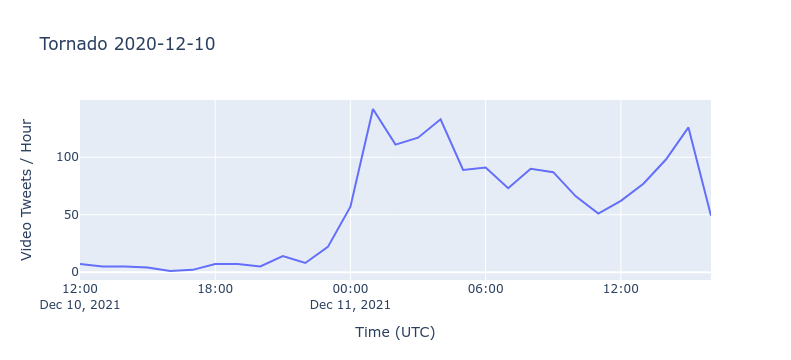

In [9]:
from plotly import express as xp

times = df.resample('H', on='created_at').count()
xp.line(times, x=times.index, y=times.id, labels={'id': 'Video Tweets / Hour', 'index': 'Time (UTC)'}, title='Tornado 2020-12-10')

Top 25 most "liked" videos mentioning tornado from last night.

In [10]:
df = df.sort_values('public_metrics.like_count', ascending=False)

for i, row in df.head(25).iterrows():
    print(f"https://twitter.com/{row['author.username']}/status/{row['id']} likes:{row['public_metrics.like_count']}")

https://twitter.com/spann/status/1469519138343337990 likes:6245
https://twitter.com/WX_ManMike/status/1469513318180216836 likes:4893
https://twitter.com/__HunterKing__/status/1469568785661284354 likes:2946
https://twitter.com/SuHcLuDe/status/1469571965375631360 likes:2078
https://twitter.com/BrandonCopicWx/status/1469488183331246084 likes:2028
https://twitter.com/ReedTimmerAccu/status/1469500499196006402 likes:1733
https://twitter.com/CollinGrossWx/status/1469506472656703488 likes:1575
https://twitter.com/ABC/status/1469629790227517441 likes:1535
https://twitter.com/mitchell_knight/status/1469656473068265479 likes:1529
https://twitter.com/LiveStormChaser/status/1469496507204349956 likes:1479
https://twitter.com/StephenMorganTV/status/1469518060088406016 likes:1395
https://twitter.com/journalismjenna/status/1469507656020860929 likes:1386
https://twitter.com/US_Stormwatch/status/1469503966505418755 likes:1188
https://twitter.com/Channel4News/status/1469651862668386306 likes:1136
https://

The first one:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Video of the tornado that hit the Amazon facility near Edwardsville, IL tonight… from Danielle Henke <a href="https://t.co/5CNbJ03VzI">pic.twitter.com/5CNbJ03VzI</a></p>&mdash; James Spann (@spann) <a href="https://twitter.com/spann/status/1469519138343337990?ref_src=twsrc%5Etfw">December 11, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 